# Pytorch Tutorial

In [1]:
# Install pytorch
import sys
!{sys.executable} -m pip install torch torchvision torchinfo

  Using cached torchinfo-1.7.1-py3-none-any.whl (22 kB)


In [3]:
import torch
import torch.utils.data as Data
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms
from torchinfo import summary


%matplotlib inline

Check the version of pytorch that you have installed. <br>
Make sure that you refer the correct version of the online documentation at 
https://pytorch.org/docs/versions.html

In [4]:
print('PyTorch version: ',torch.__version__)

# Check if GPU version of Pytorch is installed
print('CUDA Available: ',torch.cuda.is_available())


PyTorch version:  1.13.1+cu116
CUDA Available:  True


# Part I: Pytorch Basics

A PyTorch Tensor is conceptually identical to a numpy array: a Tensor is an n-dimensional array, and PyTorch provides many functions for operating on these Tensors. However unlike numpy arrays, PyTorch Tensors can also utilize GPUs to accelerate their numeric computations. For this exercise, it is sufficient to run the code provided in the CPU.

Lets start with basic operations on torch tensor

### Constructing Tensors

In [5]:
# Construct an uninitialized 5x3 matrix
x_empty = torch.empty(5, 3)  # similar to np.empty 
print('Empty tensor:\n',x_empty)

Empty tensor:
 tensor([[9.0000e-39, 4.2246e-39, 1.0286e-38],
        [1.0653e-38, 1.0194e-38, 8.4490e-39],
        [1.0469e-38, 9.3674e-39, 9.9184e-39],
        [8.7245e-39, 9.2755e-39, 8.9082e-39],
        [9.9184e-39, 8.4490e-39, 9.6429e-39]])


In [6]:
# Construct a matrix filled zeros and of dtype long:
x_zeros = torch.zeros(5, 3, dtype=torch.long) # similar to np.zeros
print('Zero tensor:\n',x_zeros)

Zero tensor:
 tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [7]:
# Construct a tensor directly from data
x_list = torch.tensor([5.5, 3])
print('Tensor from list:\n',x_list)

Tensor from list:
 tensor([5.5000, 3.0000])


### Convert numpy array to torch tensor or vice versa

In [8]:

np_data = np.arange(6).reshape((2, 3))
torch_data = torch.from_numpy(np_data) # Numpy Array -> Torch Tensor

tensor2array = torch_data.numpy()      # Torch Tensor -> Numpy Array

print(
    '\nnumpy array:\n', np_data, '\n',          
    '\nOutput of numpy array -> tensor conversion:\n', torch_data, '\n',    
    '\nOutput of tensor -> numpy array conversion:\n', tensor2array,'\n', 
)



numpy array:
 [[0 1 2]
 [3 4 5]] 
 
Output of numpy array -> tensor conversion:
 tensor([[0, 1, 2],
        [3, 4, 5]], dtype=torch.int32) 
 
Output of tensor -> numpy array conversion:
 [[0 1 2]
 [3 4 5]] 



### Making a neural network : Preliminaries

In an artificial neuron, we combine the inputs by adding them up, and the resultant sum is the input to the sigmoid function which controls the output. This reflects how real neurons work. The following diagram illustrates this idea of combining inputs and then applying the threshold to the combined sum.


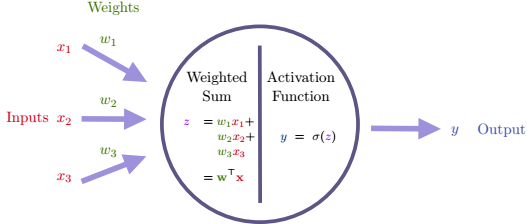

If the combined signal is not large enough then the effect of the sigmoid threshold function is to suppress the output signal. If the sum x if large enough the effect of the sigmoid is to fire the neuron. Interestingly, if only one of the several inputs is large and the rest small, this may be enough to fire the neuron. What’s more, the neuron can fire if some of the inputs are individually almost, but not quite, large enough because when combined the signal is large enough to overcome the threshold. A neural network is just a network consisting of multiple artificial neurons interconnected with weighted links.


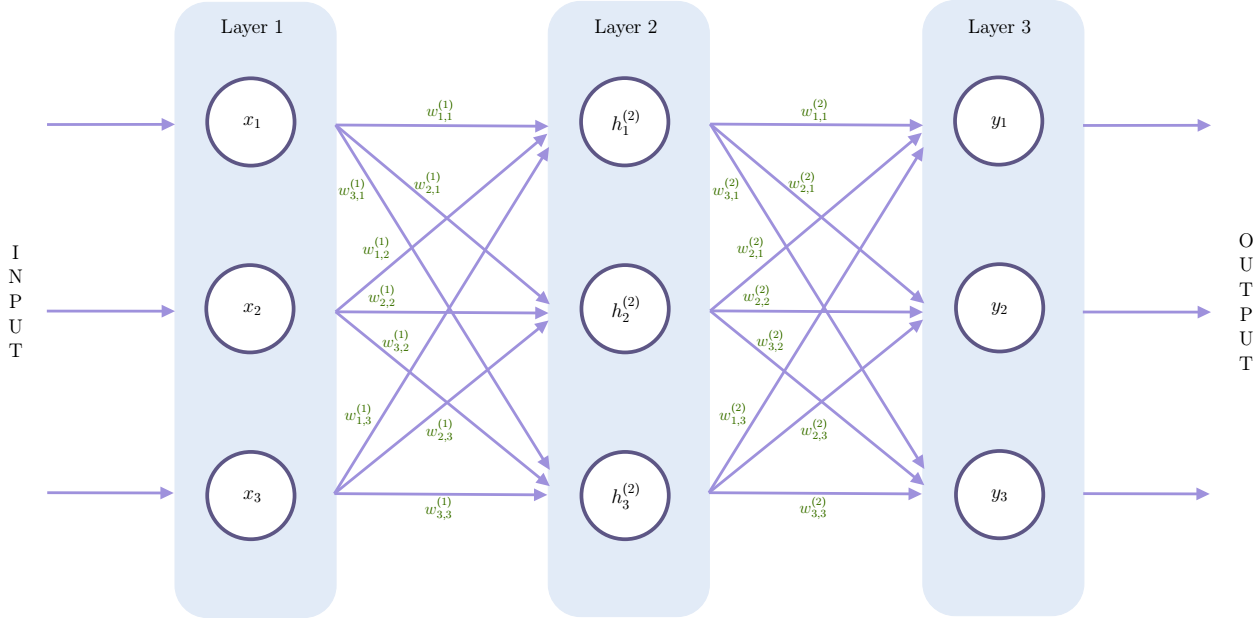

$$\mathbf{x} =\begin{bmatrix} x_1 \\
x_2\\
x_3 \end{bmatrix} \qquad \mathbf{W} =\begin{bmatrix} w_{1,1} & w_{1,2} & w_{1,3}  \\
w_{2,1} & w_{2,2} & w_{2,3}  \\
w_{3,1} & w_{3,2} & w_{3,3}  \\ \end{bmatrix} =\begin{bmatrix} \text{---} & \mathbf{w_1} & \text{---}  \\
\text{---} & \mathbf{w_2} & \text{---}  \\
\text{---} & \mathbf{w_3} & \text{---}  \end{bmatrix}\\[1cm]$$



The outputs of a neural network can be written in  terms of inputs and weights which is illustrated as follows:


$$
h^{(2)}_2 = \sigma\Bigl((w^{(1)}_{2,1}x_1) + (w^{(1)}_{2,2}x_2) + (w^{(1)}_{2,3}x_3)\Bigr) =  \sigma\Bigl(\mathbf{w_2^{(2)}}^\top\mathbf{x}\Bigr)\\[0.25cm]
\mathbf{h}^{(2)} = \begin{bmatrix}h^{(2)}_1 \\h^{(2)}_2 \\h^{(2)}_3 \end{bmatrix} =  \begin{bmatrix}\sigma\Bigl(\mathbf{w_1^{(2)}}^\top\mathbf{x}\Bigr) \\
\sigma\Bigl(\mathbf{w_2^{(2)}}^\top\mathbf{x}\Bigr)\\
\sigma\Bigl(\mathbf{w_3^{(2)}}^\top\mathbf{x}\Bigr) \end{bmatrix} = \sigma\Bigl(\mathbf{W}\mathbf{x}\Bigr).
$$


Key Points:

- The many calculations needed to feed a signal forward through a neural network can be expressed as matrix multiplication.

- Expressing it as matrix multiplication makes it much more concise for us to write, no matter the size of neural network.

### Making a neural network : Activation Functions

As we have introducted activation functions, let's use them in pytorch.

In [9]:
# generate some fake data
x = torch.linspace(-5, 5, 200)  # x data (tensor), shape=(200, 1)
x_np = x.data.numpy()   # numpy array for plotting

In [10]:
# following are some common activation functions
y_relu = F.relu(x).data.numpy()
y_sigmoid = torch.sigmoid(x).data.numpy()
y_tanh = torch.tanh(x).data.numpy()


# y_softmax = F.softmax(x)
# softmax is a special kind of activation function, it is about probability
# and will make the sum as 1.

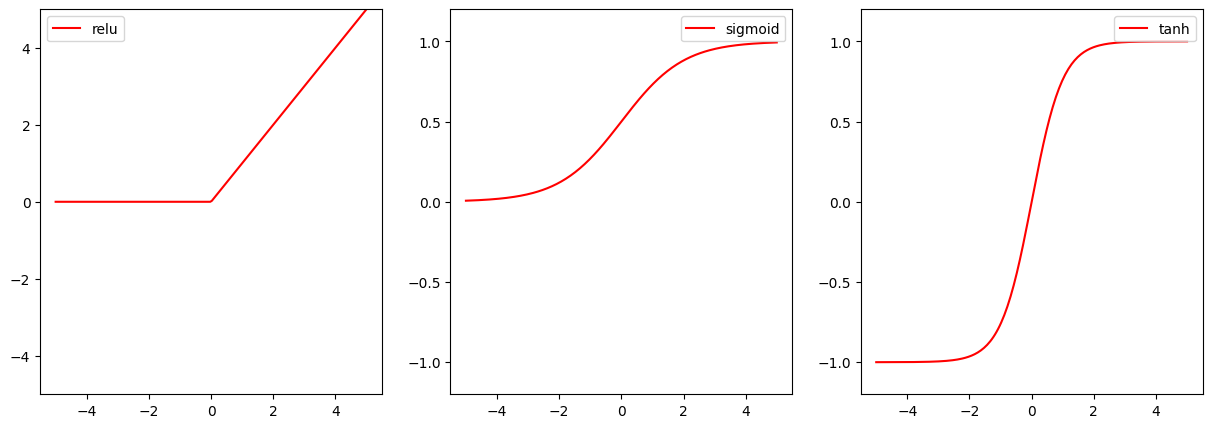

In [11]:
# plot these activation functions
plt.figure(1,(15,5))

plt.subplot(131)
plt.plot(x_np, y_relu, c='red', label='relu')
plt.ylim((-5, 5))
plt.legend(loc='best')

plt.subplot(132)
plt.plot(x_np, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(133)
plt.plot(x_np, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')


plt.show()

### Making a neural network : optimizers

In order to minimize a cost function, we use an optimization algorithm that does it for us. Most common optimization algorithm is the stochastic gradient descent, however there are different algorithms that can be used. We use the optim package to define an Optimizer that will update the weights for us. The optim package defines many optimization algorithms that are commonly used for deep learning, including SGD+momentum, RMSProp, Adam, etc.

#### Dataset used for demonstration
$ y = x^2 + (0.1 \times e); \quad x\in [-1,1] ,\  e \in \mathcal{N}(0,1)  $

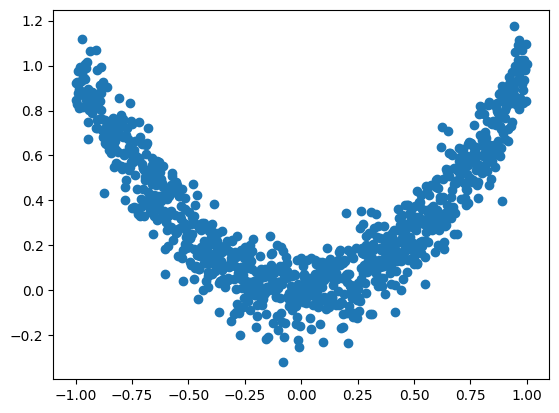

In [12]:
torch.manual_seed(1)    # reproducible

LR = 0.01
BATCH_SIZE = 128#32
EPOCH = 12

# dataset
x = torch.unsqueeze(torch.linspace(-1, 1, 1000), dim=1)
y = x.pow(2) + 0.1*torch.normal(mean=torch.zeros(*x.size()),std=1)

# plot dataset
plt.scatter(x.numpy(), y.numpy())
plt.show()

In [13]:
# Load the data
torch_dataset = Data.TensorDataset(x,y)
loader = Data.DataLoader(
    dataset=torch_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True, num_workers=2,)

In [14]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(1, 20)   # hidden layer
        self.predict = torch.nn.Linear(20, 1)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

In the example given below, we shall train **4 neural networks** with the 
**same network architecture** but **different optimizer**.

In [15]:
net_SGD         = Net()
net_Momentum    = Net()
net_RMSprop     = Net()
net_Adam        = Net()
nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam]

In [16]:
opt_SGD         = torch.optim.SGD(net_SGD.parameters(), lr=LR)
opt_Momentum    = torch.optim.SGD(net_Momentum.parameters(), lr=LR, momentum=0.8)
opt_RMSprop     = torch.optim.RMSprop(net_RMSprop.parameters(), lr=LR, alpha=0.9)
opt_Adam        = torch.optim.Adam(net_Adam.parameters(), lr=LR, betas=(0.9, 0.99))
optimizers = [opt_SGD, opt_Momentum, opt_RMSprop, opt_Adam]

In [17]:
loss_func = torch.nn.MSELoss()
losses_his = [[], [], [], []]   # for storing loss from each network

# training
for net, opt, l_his in zip(nets, optimizers, losses_his):
    for epoch in range(EPOCH):
        for step, (batch_x, batch_y) in enumerate(loader):          # for each training step
        
            output = net(batch_x)              # get output for every net
            loss = loss_func(output, batch_y)  # compute loss for every net
            opt.zero_grad()                # clear gradients for next train batch
            loss.backward()                # backpropagation, compute gradients
            opt.step()                     # apply gradients
            l_his.append(loss)             # store the loss 



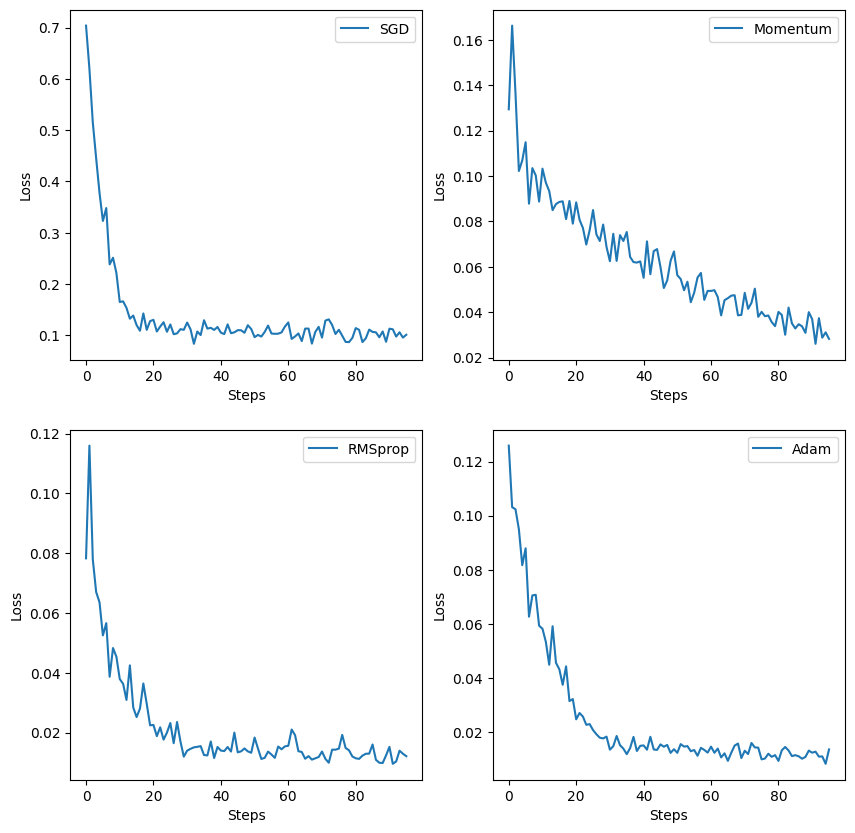

In [18]:
plt.figure(1,(10,10))
labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']
for i in range(4):
    
    # The matplotlib plot function accepts numpy arrays as input.
    # Before converting to numpy, we turn off the gradient calculation by using detach()
    # In case the array is loaded in the GPU (cuda device), the array needs to be loaded 
    # back to the CPU.
    
    loss = torch.tensor(losses_his[i]).detach().cpu().numpy()
    
    label = labels[i]
    plt.subplot(221+i)
    plt.plot(loss, label=label)
    plt.legend(loc='best')
    plt.xlabel('Steps')
    plt.ylabel('Loss')



plt.show()

# Part II:  Implementation of network from task 5.1

In [19]:

class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(2, 3, bias=False)   # hidden layer: 2 input neurons; 3 output neurons
        self.predict = torch.nn.Linear(3, 1, bias=False)   # output layer: 3 input neurons; 1 output neurons
        
        # Initialize weights
        with torch.no_grad():
            W1 = torch.FloatTensor([[2,1],
                               [1,-2],
                               [1,5]
                              ])

            W2 = torch.FloatTensor([-1,3,2])

            self.hidden.weight= torch.nn.Parameter(W1)
            self.predict.weight= torch.nn.Parameter(W2)

    def forward(self, x):

        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x
    
# Initialize the network   
net = Net()

# Loss function
loss_func = torch.nn.MSELoss() 

optimiser= torch.optim.SGD(net.parameters(), lr=0.05)

In [20]:
# Network input and target
x = torch.FloatTensor([1,2])
y_target = torch.tensor(3.0).float()


# Forward pass
y_output = net(x)

# Loss calculation
loss = loss_func(y_output,y_target)
# Calculate gradient
loss.backward() 
# Perform gradient descent update
optimiser.step()

print('Network Output =',y_output.item())
print('Loss =',loss.item())
print('\n\n')

print('Gradient of loss with respect to weight matrix of hidden layer W0:\n',net.hidden.weight.grad)
print('\n\n')
print('Gradient of loss with respect to weight matrix of output layer W1:\n',net.predict.weight.grad)
print('\n\n')


print('Updated weight matrix of hidden layer W0:\n',net.hidden.weight.data)
print('\n\n')
print('Updated weight matrix of output layer W1:\n',net.predict.weight.data)
print('\n\n')

Network Output = 18.0
Loss = 225.0



Gradient of loss with respect to weight matrix of hidden layer W0:
 tensor([[-30., -60.],
        [  0.,   0.],
        [ 60., 120.]])



Gradient of loss with respect to weight matrix of output layer W1:
 tensor([120.,   0., 330.])



Updated weight matrix of hidden layer W0:
 tensor([[ 3.5000,  4.0000],
        [ 1.0000, -2.0000],
        [-2.0000, -1.0000]])



Updated weight matrix of output layer W1:
 tensor([ -7.0000,   3.0000, -14.5000])





# Part III: Making a feed-forward neural network for MNIST

Lets use what we have learnt so far to train a neural network to recognize handwritten digits from MNIST data_set. We will create a simple 3 layer feed-forward neural network that is illustrated in the figure below

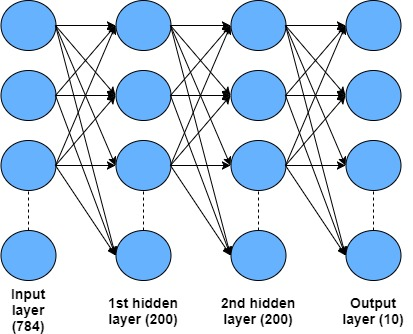

We will train this network and analyze its performance.

For simpler networks the layers can be manually connected. But PyTorch makes arranging neurons and making layers easier. The nn package defines a set of Modules, which are roughly equivalent to neural network layers. A Module receives input Tensors and computes output Tensors, but may also hold internal state such as Tensors containing learnable parameters. The nn package also defines a set of useful loss functions that are commonly used when training neural network. 

In order to create a neural network in PyTorch, we can inherit this class, this basically allows us to use all of the functionality of the nn.Module base class, but still have overwriting capabilities of the base class for the model construction / forward pass through the network. 

NOTE: please read about inheritance in python if unfamiliar.

In [21]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 200)
        self.fc2 = nn.Linear(200, 200)
        self.fc3 = nn.Linear(200, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        # To use NLL loss, logsoftmax is used instead of softmax. For cross entropy loss, use softmax
        return F.log_softmax(x,dim=1) 

Set hyper parameters.

In [22]:
batch_size=200
learning_rate=0.01
epochs=10

Load the MNIST data set.

In [23]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                   transforms.ToTensor(),
                   transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=batch_size, shuffle=True)


test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])),
        batch_size=batch_size, shuffle=True)

6.3%

100.0%


Extracting ../data\MNIST\raw\train-images-idx3-ubyte.gz to ../data\MNIST\raw



100.0%

Extracting ../data\MNIST\raw\train-labels-idx1-ubyte.gz to ../data\MNIST\raw



100.0%


Extracting ../data\MNIST\raw\t10k-images-idx3-ubyte.gz to ../data\MNIST\raw



100.0%

Extracting ../data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ../data\MNIST\raw



Visualize the data

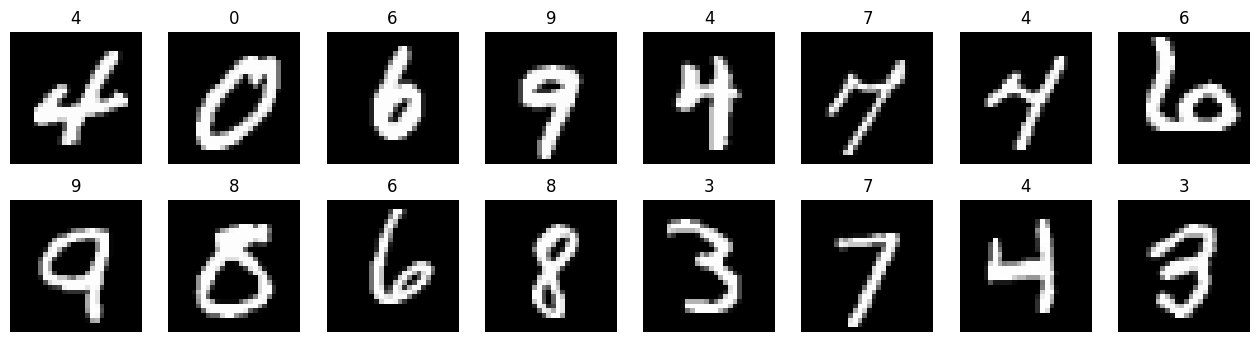

In [24]:
f, axes = plt.subplots(2,8,figsize=(16,4))
axes=axes.ravel()
for i,(images,labels) in enumerate(train_loader):
    
    # The image shape format is [batch_size, channel, height, width]
    # images[0] selects the first image in the batch whose shape is [1,28,28] because 
    # it is grayscale and has only one channel. We need to reshape this to [28,28] before passing to imshow.
    axes[i].imshow(images[0].reshape(28,28), cmap="gray",)
    
    axes[i].set_title(labels[0].item())
    axes[i].axis('off')
    
    # Since the subplot initialized for 16 images, we break at i=15
    if i == 15:
        break

Show the net.

In [25]:
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=10, bias=True)
)


Set the loss function and the optimization criteria

In [26]:
# create a stochastic gradient descent optimizer
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)

# create a loss function
criterion = nn.NLLLoss()

Run the main loop to train the network. 

Note: The first step here is to flatten the network input because feed-forward network takes vectors and not matrices (or images) as input.

In [27]:

# run the main training loop
for epoch in range(epochs):
    total_loss = 0.0
    for batch_idx, (data, target) in enumerate(train_loader):
        
        # reshape data from (batch_size, 1, 28, 28) to (batch_size, 28*28)
        data = data.view(-1, 28*28)
        
        optimizer.zero_grad()
        
        net_out = net(data)
        
        loss = criterion(net_out, target)
        total_loss+=loss.data
        
        loss.backward()
        optimizer.step()

    print('Train Epoch: {} Avg. Training Loss: {:.6f}\n'.format(
                epoch+1,
                total_loss/len(train_loader.dataset)))

Train Epoch: 1 Avg. Training Loss: 0.002732

Train Epoch: 2 Avg. Training Loss: 0.000987

Train Epoch: 3 Avg. Training Loss: 0.000700

Train Epoch: 4 Avg. Training Loss: 0.000532

Train Epoch: 5 Avg. Training Loss: 0.000423

Train Epoch: 6 Avg. Training Loss: 0.000347

Train Epoch: 7 Avg. Training Loss: 0.000283

Train Epoch: 8 Avg. Training Loss: 0.000242

Train Epoch: 9 Avg. Training Loss: 0.000202

Train Epoch: 10 Avg. Training Loss: 0.000175



Run the testing loop

In [28]:
test_loss = 0.0
correct = 0.0

for data, target in test_loader:
    
    data = data.view(-1, 28 * 28)
    
    net_out = net(data)
    
    # sum up batch loss
    test_loss += criterion(net_out, target).data
    
    pred = net_out.data.max(dim=1)[1]  # get the index of the max log probability. Here [1] returns the argmax. 
    correct += pred.eq(target.data).sum()

test_loss /= len(test_loader.dataset)
print('\nTest set: Average loss: {:.4f}, Accuracy: {:.0f}/{} ({:.2%})\n'.format(
    test_loss, correct, len(test_loader.dataset),correct / len(test_loader.dataset)))


Test set: Average loss: 0.0003, Accuracy: 9776/10000 (97.76%)



In [29]:
summary(net, input_size=(1, 784))

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [1, 10]                   --
├─Linear: 1-1                            [1, 200]                  157,000
├─Linear: 1-2                            [1, 200]                  40,200
├─Linear: 1-3                            [1, 10]                   2,010
Total params: 199,210
Trainable params: 199,210
Non-trainable params: 0
Total mult-adds (M): 0.20
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.80
Estimated Total Size (MB): 0.80